# Week 2: Fundamentals of Statistical Distributions
This week's content will cover:
* Probability Density Functions and Cumulative Density Functions
* Common Probability Distributions
* Parameters and Properties

## 1: Probability Density Functions and Cumulative Density Functions
A *Probability Density Function (PDF)* is a function, $f(x)$, whose value represents the relative *likelihood* that if we select a random value it will be equal to $x$. 

The probability distribution function of a variable is entirely determined by its *statistical distribution* and its *parameters*. One of the most significant statistical distributions in wind energy is the *Weibull distribution*, which is commonly used to model mean wind speed and failure behaviour.

Let us consider an example Weibull PDF, showing the likelihood of failure at a given time
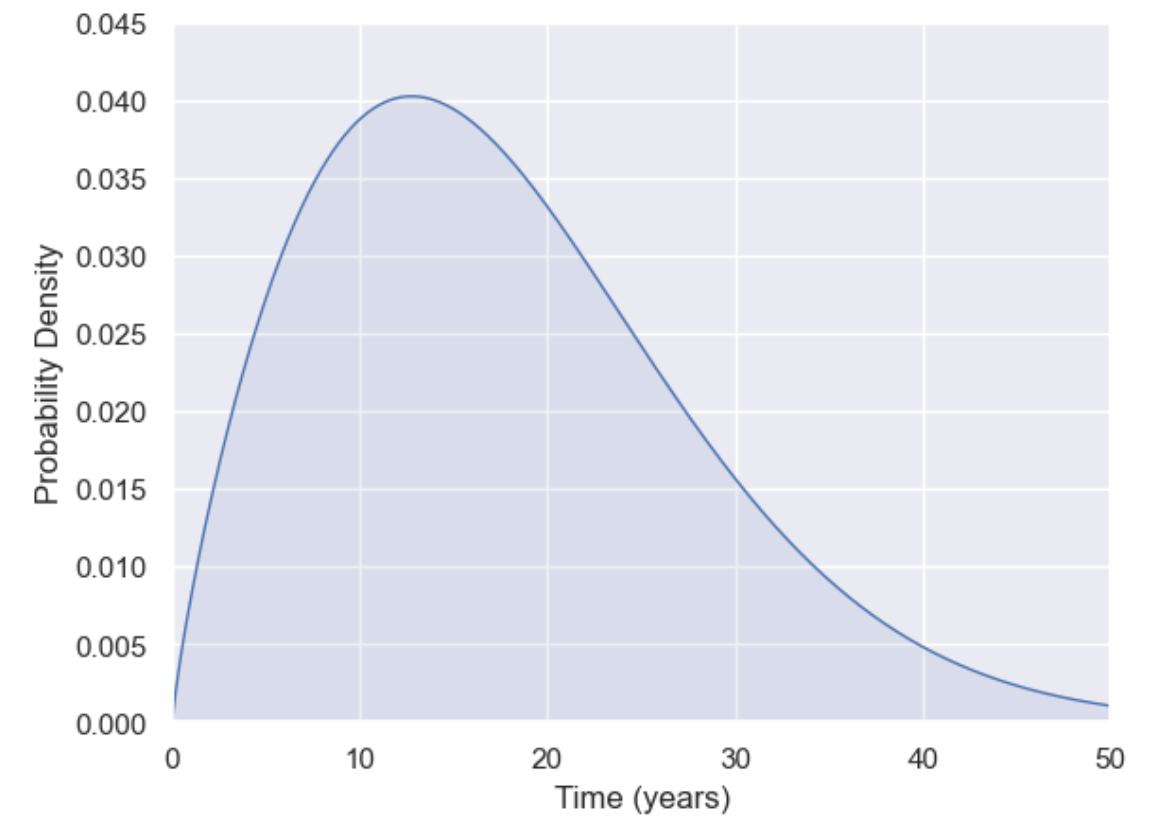Let's look at the failure rates at the first time steps of year 10 and year 20
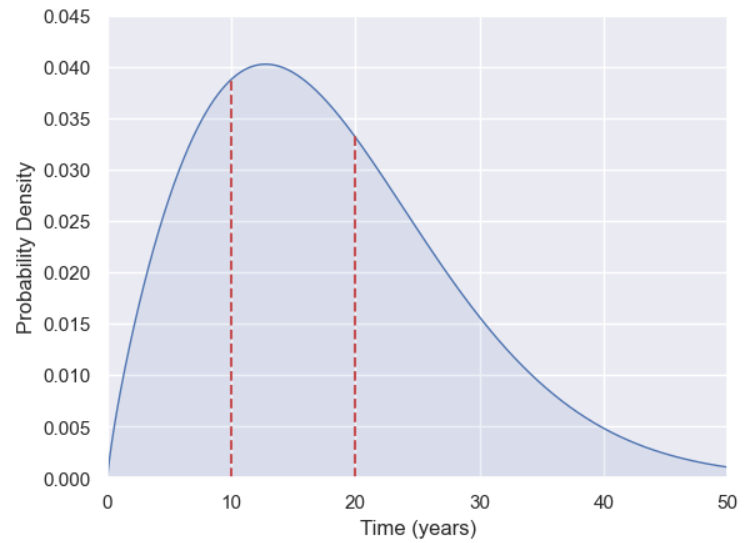
We can see that the relative *likelihood* of failure at the start of year 10 is higher than the likelihood of failure at the start of year 20. This is useful for comparison but it's hard to understand what this likelihood really represents - a more tangible figure is the *probability of occurance*, $P(x)$. To convert probability density to probability we integrate the PDF to get the area under the curve. For a single point, $x$, this gives
$$P(X=x)=\int^x_x f(t) \ dt = 0.$$
This is because the space between one point and itself in the horizontal direction is 0 - so the area must be 0. Conversely, by the laws of probability we know that the probability of all possible options must be exactly 1. Therefore, we see that the probability of $X$ being included in the domain, $\mathcal{D}$, of the PDF is 1
$$P(X\in\mathcal{D})=\int_{\mathcal{D}} f(t) \ dt = 0.$$
Most PDFs are defined over the domain of *real numbers*, which is all non-imaginary numbers between negative and positive infinity, i.e.
$$P(X\in\mathbb{R})=\int^\infty_{-\infty} f(t) \ dt = 0.$$
The most intuitive insight we can gain is from integrating over a non-zero, non-infinite interval
$$P(X\in [x_1, x_2])=P(x_1\leq X \leq x_2) = \int^{x_2}_{x_1} f(t) \ dt$$
giving us the probability that the value $X$ lies between the lower limit $x_1$ and the upper limit $x_2$. For example the probability of failure occurring between the start of year 10 and the start of year 20 is equal to the area of the shaded region below.
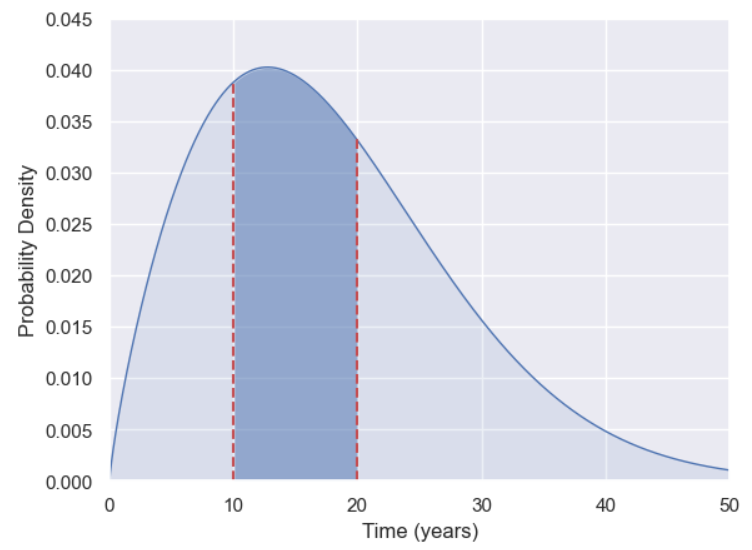
If we set the lower bound, $x_1$ equal to 0, we then gain the probability that failure occurs *before* time $x_2$. For example the probability of failure occurring before year 20 is given by this shaded region.
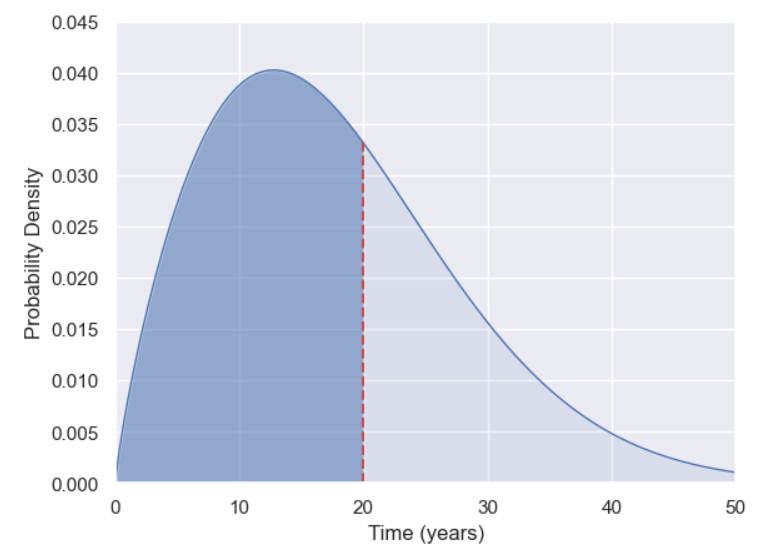
This integral is a special case, representing the *Cumulative Distribution Function (CDF)*, $F(x)$, defined as
$$F(x)=P(X\leq x)=P(0\leq X \leq x) = \int^x_0 f(t) \ dt.$$
The equivalent CDF is given below
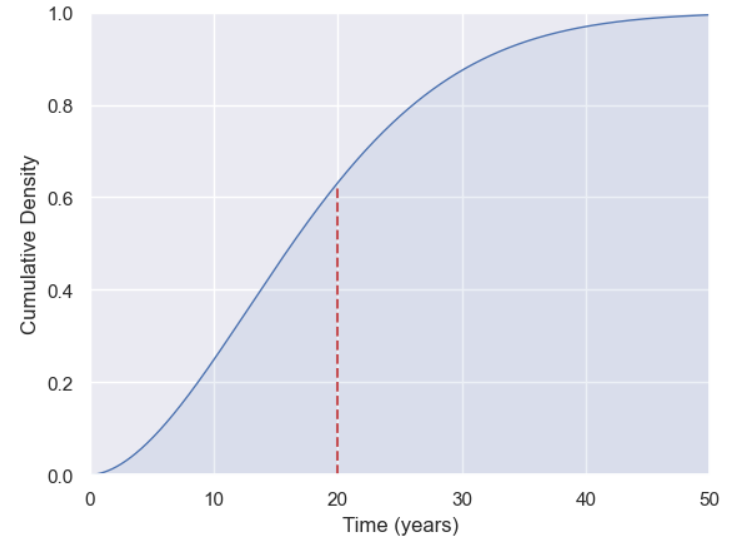
indicating that the probability of failure before year 20 is a little over 0.6.

## 2: Common Statistical Distributions
Probability Density Functions may seem like a very abstract and mathematical concept, but they have lots of applications in the real world, and within wind energy, to model *random variables*. This term is made up of two parts. *Variable* defines a value that can be observed, measured, or counted that can take on different values. A *random variable* is more specifically a variable whose value is a numerical outcome of a random phenomenom and therefore determined by chance and probability

Random phenomena dictate most of what goes on in the natural world, so when we're working in spaces like renewable energy where we're looking at naturally acting (and therefore random!) behaviour we are usually working with random variables. Some examples of common random variables in wind energy are
* Mean Wind Speed - the mean value of wind speed in (generally) 10-minute intervals
* Turbulence Intensity - the standard deviation normalized by the mean value of wind speed in (generally) 10-minute intervals
* Extreme Wind Speed - the highest mean wind speed in a (typically) 50 year period
* Failure Time - the time until a component, or turbine, will experience failure
* Mean Temperature - the mean value of temperature in (generally) 10-minute intervals
* Extreme Temperature - the highest temperature in a (typically) 50 year period

There are two very important statistical characteristics which pop up a few times in these common variables:
* Mean ($\mu$) - the expected value of a random value, $\mathbb{E}(x)$, approximated by the sample mean
$$\hat{X}=\frac{\sum^n_{i=1}x_i}{n}$$
* Standard Deviation ($\sigma$) - the square root of the expected squared variation from the mean $\sqrt{\mathbb{E}\left(x-\mu)^2\right)}$, approximated by the sample standard deviation
$$\hat{S} = \sqrt{\frac{\sum^n_{i=1}\left(x-\hat{X}\right)^2}{n-1}}^{[2]}.$$

These characteristics can also be used to describe the random variables. For example the average Mean Wind Speed may be 7.5 m/s, but the average Extreme Wind Speed (50 years) could be around 30 m/s. The mean wind speed is also likely to have a lower standard deviation, or variance. These characteristics, amongst others, determine the overall distribution - a few examples are
* Mean - The value at which the area under the curve on the left on this value is equal to the area under the curve on the right of this value
* Standard deviation - a large SD leads to a narrower curve with a higher peak, whilst a lower SD leads to a wider, flatter curve
* Limits - mean wind speed can never be negative, but temperature may be, so these have different limits and domains of the curve
* Skew - Failures are unlikely to occur in the early years of a modern turbine's life so this distribution is likely to be skewed to the right (towards later times)

When trying to model a random variable we wish to fit a Probability Density Function that matches these properties as closely as possible.

There are many different Probability Density Functions, each have their own unique shapes and properties, which are further tuned by their parameters. The following sections will define the most commonly used distributions in Wind Energy and some of their properties. In Week 4 (next statistics session) we will look at how we can select the most appropriate distribution and tune it using Python code.


### 2.1: The Weibull Distribution

Section 1 demonstrated an example of the *Weibull* distribution, typically used to model Mean Wind Speed and Failure Time. This distribution is defined by its Probability Density Function
$$f(x) = \begin{cases} \frac{k}{A}\left(\frac{x}{A}\right)^{k-1}e^{-\left(\frac{x}{A}\right)^k} & \text{ if } x \geq 0\\
0 & \text{ otherwise.} \end{cases}$$

It is very common with probability density function to see this case notation, where a probability function is defined over some domain, here positive numbers (greater than or equal to 0), and probability is set to 0 for all other cases.

In this equation we have the *random variable*, $x$, Euler's constant, $e$, and then two more letters, $A$ and $k$. These are the two *parameters* of the distribution:
* $k$ - the *shape* parameter
* $A$ - the *scale* parameter.
  
These two parameters in combination give us all the information we need to know about the Weibull distribution!

The value of the *shape parameter*, $k$, determines how the occurrence behaviour changes as we increase $x$. This parameter is really important in the failure rate context where we model $x$ as failure time. Specifically in this context:
* $k$ < 1: Failure rate is decreasing over time
* $k$ = 1: Constant failure rate not changing with time
* $k$ > 2: Failure rate is increasing over time.

The other significant parameter we are interested in is the *scale* parameter, $A$. This value represents the *characteristic value* signifying the time at which 63.2% of the population lies before this value. For example, if we set the scale parameter to 10, the probability that a random variable has value less than or equal to 10 is 63.2%.


Increasing this value pushes the distribution to the right, with the peak later and lower in magnitude, increasing the mean value. Conversely decreasing this value pushes the distribution to the left, with the peak earlier in time and higher in magnitude, decreasing the mean value.

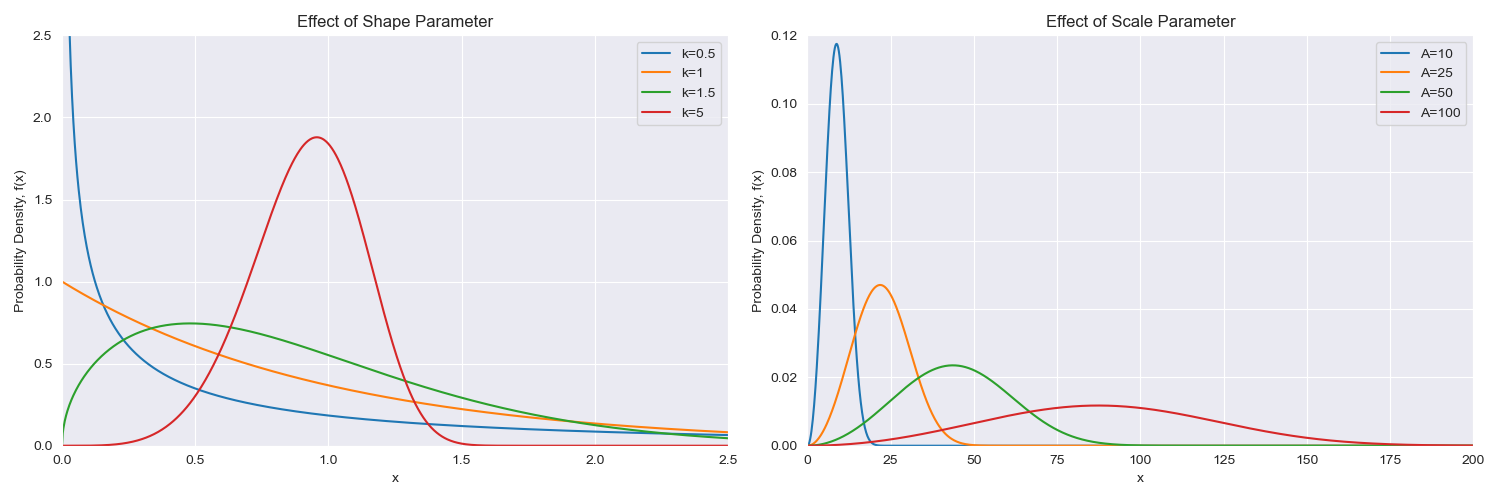

### 2.2: The Exponential Distribution

When the Weibull shape parameter, $k$, is equal to 1 we see that the PDF becomes a much simpler equation
\begin{align}
f(x) &= \frac{k}{A}\left(\frac{x}{A}\right)^{1-1}e^{-\left(\frac{x}{A}\right)^1}\\
&= \frac{1}{A}\left(\frac{x}{A}\right)^0e^{-\left(\frac{x}{A}\right)}\\
&=  \frac{1}{A}e^{-\left(\frac{x}{A}\right)}.
\end{align}

This is a special case of the Weibull distribution, which we refer to as the *Exponential Distribution*. When we're looking at this version we change our parameterisation and use $$\lambda = \frac{1}{A}.$$

This gives us the exponential PDF
$$f(x) = \begin{cases} \lambda e^{-\lambda x} & \text{ if } x\geq 0\\
0 & \text{ otherwise.}
\end{cases}$$

As previously mentioned in the failure behaviour modelling case when $k=1$ the rate of failure is constant. In this case we say that failure is *exponentially distributed*. 

This distribution only has one parameter
* $\lambda$ - the rate parameter
  
This parameter refers to the rate of occurence, and is the inverse of the distribution mean,
$$\mu = \frac{1}{\lambda}.$$

For example, in the failure case $\lambda$ is equivalent to the failure rate, and the mean time to failure is calculated as $\frac{1}{\lambda}$.

Therefore, increasing the rate parameter decreases the mean, whilst decreasing the rate parameter increases the mean.

### 2.3: The Normal (Gaussian) Distribution

The Normal Distribution, or *Gaussian Distribution*, is often regarded as the most important distribution. The reason for this comes from *Central Limit Theorem*, which states that, under some conditions$^1$, sample mean of a random variable is itself a random variable, and that the distribution of this variable converges to the Normal Distribution as the number of samples approaches infinity. Let's imagine we measure the wind speed, $v$, every hour for $n$ years, taking each hour as a sample of the random variable $v$. Central limit theorem suggests that if we take the mean value, $\hat{v}$, from each sample that we now have a new sample of a new random variable $\hat{v}$, and that as we increase $n$, the distribution of $\hat{v}$ begins to look more and more like the Normal Distribution. This means that whenever we have a large sample of a mean value, we can approximate its distribution using the Normal Distribution.
 
The Gaussian Probability Density Function is defined as
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}.$$
We see that unlike the Weibull distribution the domain of the Normal Distribution is not limited to just the positive numbers, it is defined over the whole real space so there is only a single case.

The paramaters of this equation are
* $\mu$ - the *mean*
* $\sigma$ - the *standard deviation.*
  
These two parameters in combination give us all the information we need to know about the Normal Distribution! As we have very natural estimators for these values it is very easy to estimate these parameters using the sample mean and sample standard deviation.


The value of the *mean*, $\mu$, determines the central point of the distribution, where half of the distribution lies on either side. The Normal Distribution is *symmetrical*, so it is the same either side of the mean.

The other significant parameter we are interested in is the *standard deviation* parameter, $A$. This value represents the *spread* of the data. A large standard deviation means a wide distribution with a low peak, and a small standard deviation means a narrow distribution with a high peak.

The below images show the effect of changing these parameters.
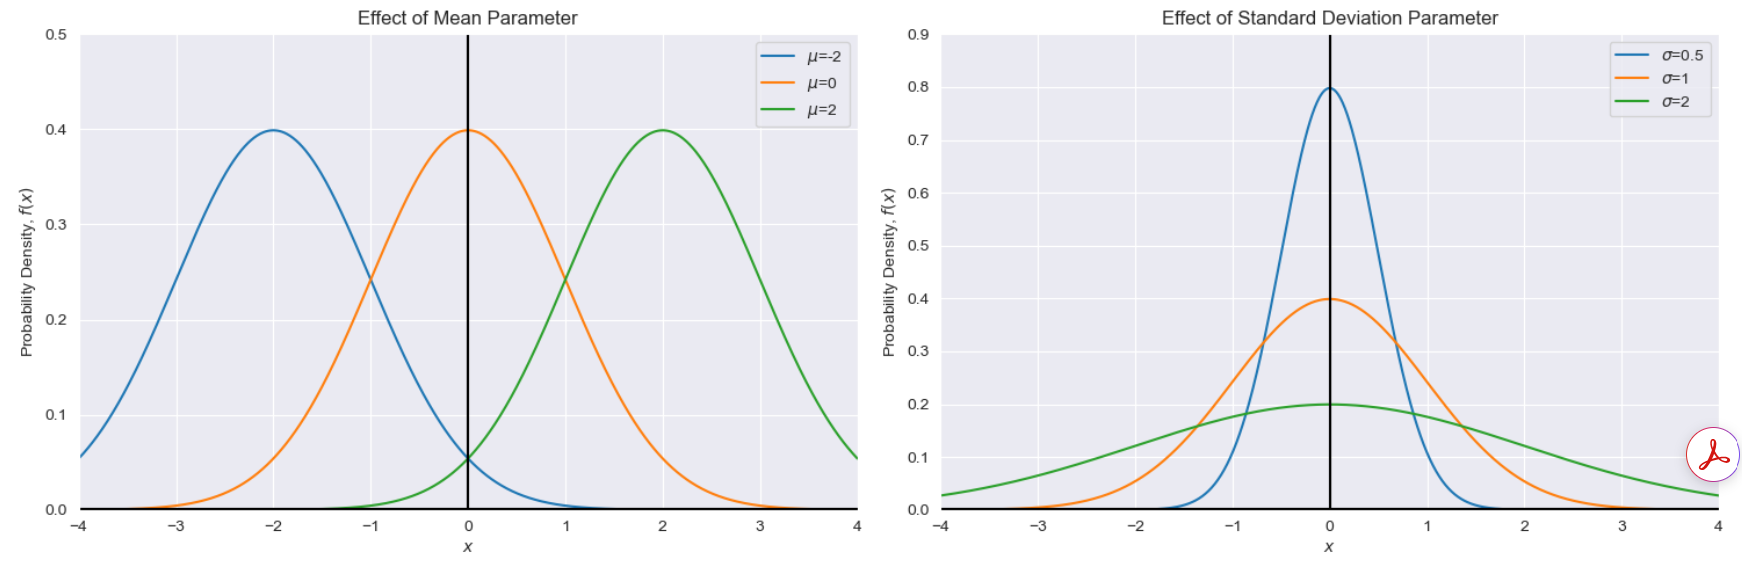

### 2.4: The Gumbel Distribution

The Gumbel distribution is often referred to as the *extreme value distribution*, and is used commonly in wind energy to model extreme wind speeds. It is defined by its PDF
$$f(x) = {\frac {1}{\beta }}e^{-(\frac{x-\mu}{\beta}+e^{-\frac{x-\mu}{\beta}})},$$
again with domain over all real values including negative space. The two parameters we see in this equation are
* $\beta$ - the scale parameter. This parameter must be positive.
* $\mu$ - the location parameter. In this case $\mu$ is not the distribution mean (this notation is unfortunately confusing!)

The scale parameter affects the spread of the distribution. Increasing the scale parameter results in a wider, flatter distribution, whilst a smaller scaler parameter gives a narrower, peakier distribution.

The location parameter refers to the location of the peak of the distribution. For a symmetrical distribution, the peak is also the mean however the Gumbel distribution is *skewed*, which means the distribution does not look the same either side of the peak. This means that the peak here is not necessarily the mean. Increasing the location parameter shifts the distribution to the right and increases the peak, whilst decreasing the location parameter shifts the distribution to the left.

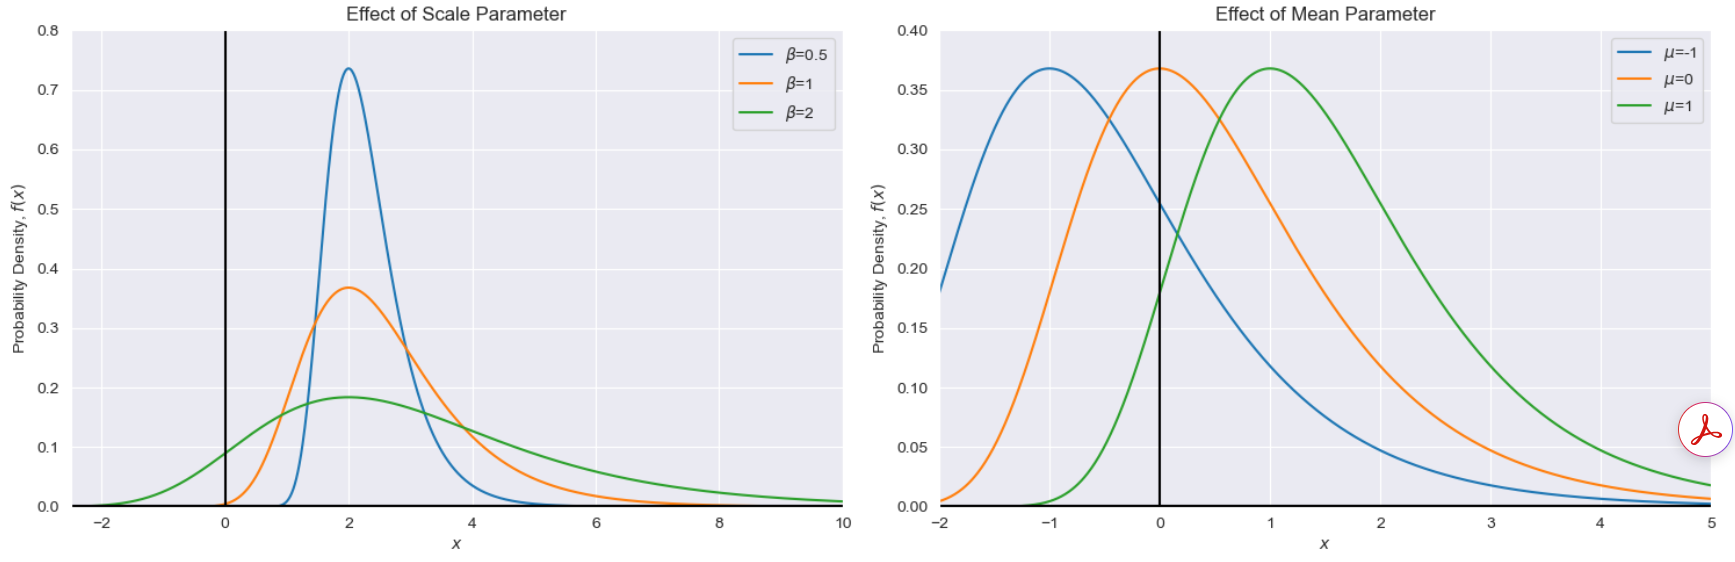

There are many more distributions, and we'll look at some of them later in the course! For the following few weeks our focus will just be on these 4 covered distributions. A summary table of their key characteristics is provided below.

| Distribution | Parameters | Symmetric | Domain | Examples |
|--------------|--------------|--------------|--------------|--------------|
| Weibull | $A, \ k$ | Non-symmetric | Positive-only| Mean wind speed, Failure time|
| Exponential | $\lambda$ | Non-symmetric | Positive-only| Constant failure|
| Normal | $\mu, \ \sigma$ | Symmetric | All real values | Any large sample mean|
| Gumbel | $\mu, \ \beta$ | Non-symmetric | All real values | Extreme values such as extreme wind speed |

[1] - these conditions vary and there are many different definitions. The most standard condition is that the original random variables must be independent and identically distributed, however other versions loosen or even remove this condition.

[2] - A quick note on notation - you may notice that we use the greek alphabet when talking about true population parameters, such as the mean, $\mu$, or standard deviation, $\sigma$, and the latin alphabet when we move to their sample statistic counterparts, $\hat{X}$ and $\hat{S}$. This is not by chance - in statistics we use these different alphabets to determine whether we are discussing true characteristics/parameters of the population (greek) or statistics determined through observations (latin).